# Plot T cell counts per patient

Script related to figure s2b

### Aim:
- Plot T cell counts across patients

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file

In [5]:
file_keys = home + "/Data/1/TreatmentNaive_SampleLabels.txt"

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [6]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES
Well,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18


### Define sample colours

In [7]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

In [8]:
case_colour_dict = pd.Series(sample_labels.Colour.values,
                             index=sample_labels.Case_mRNA).to_dict()

In [9]:
case_colour_dict

{1: '#e41a1c',
 4: '#377eb8',
 5: '#4daf4a',
 6: '#984ea3',
 10: '#ff7f00',
 13: '#ffff33',
 16: '#a65628',
 17: '#f781bf'}

### Define sample markers

In [10]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [11]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker
Well,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o


## Plot T cell count fractions

### Load T cell counts

#### Select cell to plot

In [91]:
cell = 'CD4' # CD8, CD4, CD4FoxP3

In [92]:
file_Tcells = home + "/Data/2/T_cell_counts.txt"

Tcell_counts = pd.read_csv(file_Tcells,
                           sep='\t',
                           index_col=None)

In [93]:
Tcell_counts.head()

,Well,Case,Label,Site,Habitat,IF_index_file,CD8,FoxP3,CD4FoxP3,CD4,Cell_counts
0,A01,10,omentum green,omentum,green,23.0,5216.0,430.0,81.0,2340.0,41027.0
1,A01,10,omentum green,omentum,green,24.0,4956.0,404.0,47.0,761.0,33929.0
2,A01,10,omentum green,omentum,green,25.0,2485.0,197.0,58.0,1824.0,20667.0
3,A01,10,omentum green,omentum,green,26.0,1826.0,195.0,52.0,680.0,11491.0
4,A01,10,omentum green,omentum,green,27.0,1961.0,183.0,49.0,892.0,19348.0


## Plot counts per patient, distingushing samples by marker

#### CD4FoxP3 cells were counted as a subset of CD4 positive cells

In [94]:
if cell == 'CD4':
    
        Tcell_counts[cell] = Tcell_counts[cell]-Tcell_counts['CD4FoxP3']
        
Tcell_counts.head()

,Well,Case,Label,Site,Habitat,IF_index_file,CD8,FoxP3,CD4FoxP3,CD4,Cell_counts
0,A01,10,omentum green,omentum,green,23.0,5216.0,430.0,81.0,2259.0,41027.0
1,A01,10,omentum green,omentum,green,24.0,4956.0,404.0,47.0,714.0,33929.0
2,A01,10,omentum green,omentum,green,25.0,2485.0,197.0,58.0,1766.0,20667.0
3,A01,10,omentum green,omentum,green,26.0,1826.0,195.0,52.0,628.0,11491.0
4,A01,10,omentum green,omentum,green,27.0,1961.0,183.0,49.0,843.0,19348.0


#### Log10 counts

In [95]:
Tcell_counts[cell] = Tcell_counts[cell].apply(np.log10).replace(float('-inf'),0)

In [96]:
cases = [6,16,5,13,17,1,4,10]

case_cat = CategoricalDtype(categories=cases,
                            ordered=True)

In [97]:
Tcell_counts['Case'] = Tcell_counts['Case'].astype(case_cat)

Tcell_counts.dropna(inplace=True,
                    how='any')        

Tcell_counts.sort_values(by=['Case',cell],
                         inplace=True)

### Get swarmplot coordinates

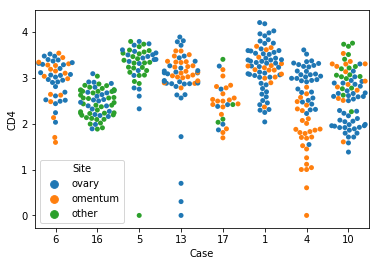

In [98]:
axs = sns.swarmplot(x='Case',
                    y=cell,
                    data=Tcell_counts,
                    hue='Site',
                    zorder=1,
                    hue_order=['ovary','omentum','other'])

In [99]:
case_colors = []
for case in Tcell_counts.Case:
    
    c = case_colour_dict[case]
    
    if c not in case_colors:
        case_colors.append(c)

In [100]:
swarm_x = []
swarm_c = []
for i in range(len(axs.collections)):
    
    for j in axs.collections[i].get_offsets():
        
        swarm_x.append(j[0])  
        swarm_c.append(case_colors[i])

In [101]:
len(swarm_x) == len(Tcell_counts.index) # This should be trueb

True

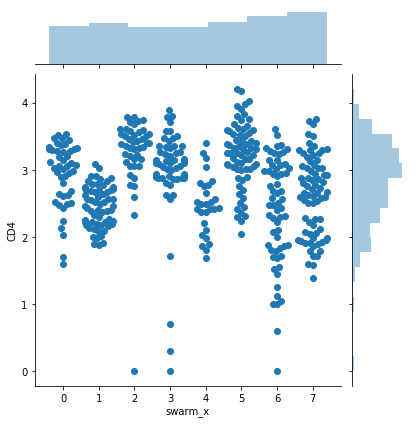

In [102]:
swarm_x_df = pd.DataFrame({'index':Tcell_counts.index,
                           'swarm_x':pd.Series(swarm_x),
                           'swarm_c':pd.Series(swarm_c)})

swarm_x_df.set_index('index', inplace=True)

Tcell_counts = pd.concat([Tcell_counts,
                          swarm_x_df],
                          axis=1)

# check the coordinates are like swarmplot
sns.jointplot(x='swarm_x',
              y=cell,
              data=Tcell_counts)

### Divide T cell counts by site

In [103]:
Tcell_counts_OV = Tcell_counts[Tcell_counts.Site=='ovary']
Tcell_counts_OM = Tcell_counts[Tcell_counts.Site=='omentum']
Tcell_counts_OT = Tcell_counts[Tcell_counts.Site=='other']

### Plot swarmplot

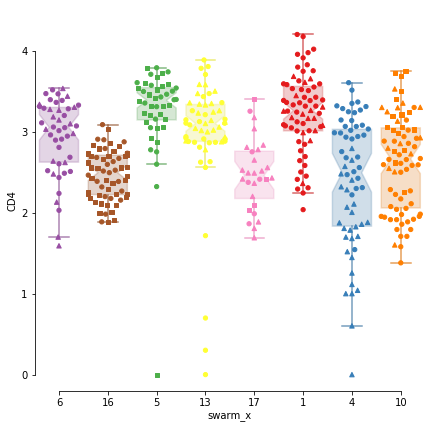

In [104]:
markersize=17

plt.figure(figsize=(7,7))

# Plot boxplots
ax = sns.boxplot(x='Case',
                 y=cell,
                 data=Tcell_counts,
                 color='white',
                 palette=case_colors,
                 showfliers=False,
                 zorder=0,
                 notch=True)
           
# Make boxplots to be coloured only on the edges
for i,artist in enumerate(ax.artists):
    
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor(col)
    artist.set_alpha(0.25)

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
    
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        
        if (j+1) % 5 == 0:
            line.set_alpha(0)
        else:
            line.set_alpha(0.75)

# Add markers for each site

# Ovary
sns.regplot(x='swarm_x',
            y=cell,
            data=Tcell_counts_OV,
            fit_reg=False,
            marker='o',
            ax=ax,
            scatter_kws={'s':markersize+1,
                         'lw':1,
                         'alpha':1, 
                         'color':list(Tcell_counts_OV.swarm_c)})

# Omentum
sns.regplot(x='swarm_x',
            y=cell,
            data=Tcell_counts_OM,
            fit_reg=False,
            marker='^',
            ax=ax,
            scatter_kws={'s':markersize+3,
                         'lw':1,
                         'alpha':1, 
                         'color':list(Tcell_counts_OM.swarm_c)})

# Other
sns.regplot(x='swarm_x',
            y=cell,
            data=Tcell_counts_OT,
            fit_reg=False,
            marker='s',
            ax=ax,
            scatter_kws={'s':markersize,
                         'lw':1,
                         'alpha':1, 
                         'color':list(Tcell_counts_OT.swarm_c)})

plt.ylim(-0.2, 4.5)

sns.despine(offset=0, trim=True)

### Save plot

In [105]:
ls ../../Figures/supplementary/2/

OVCT_Fig_s2.pdf  OVCT_Fig_s2.png  README.md        panels/


In [106]:
fig = ax.get_figure()

FILE = '../../Figures/supplementary/2/panels/s2b_TreatmentNaive_%s_Tcell_counts.pdf' % (cell)

fig.savefig(FILE, bbox='tight')

# End script